<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/winequality_red_randomforest_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
#files.upload()

In [ ]:
wine_dataset = pd.read_csv('/content/winequality-red.csv')
wine_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
wine_dataset.shape

(1599, 12)

In [ ]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#stastistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality', ylabel='count'>

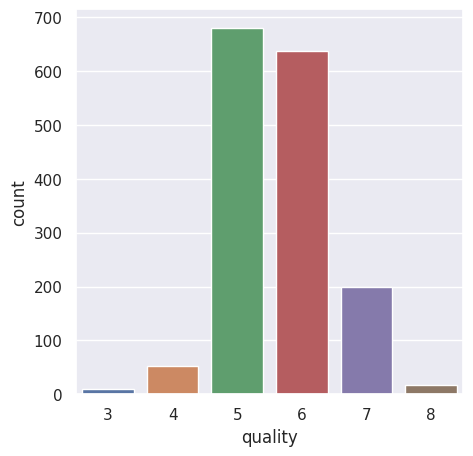

In [ ]:
#quality of wine
sns.set()
plot=plt.figure(figsize=(5,5))
sns.countplot(x ='quality', data= wine_dataset)

<Axes: xlabel='quality', ylabel='volatile acidity'>

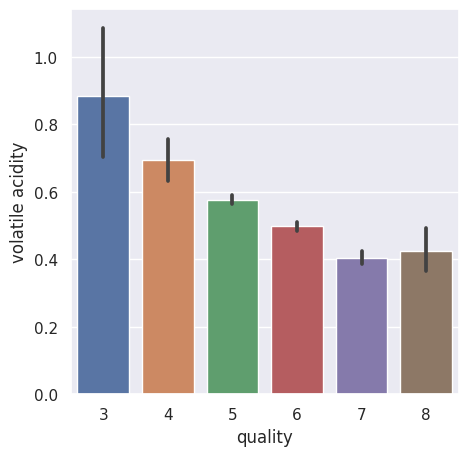

In [ ]:
#voltile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality',y ='volatile acidity', data= wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

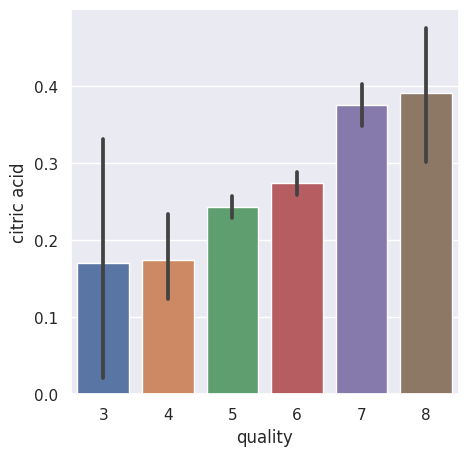

In [ ]:
#citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid', data=wine_dataset)

In [ ]:
correlation=wine_dataset.corr()

<Axes: >

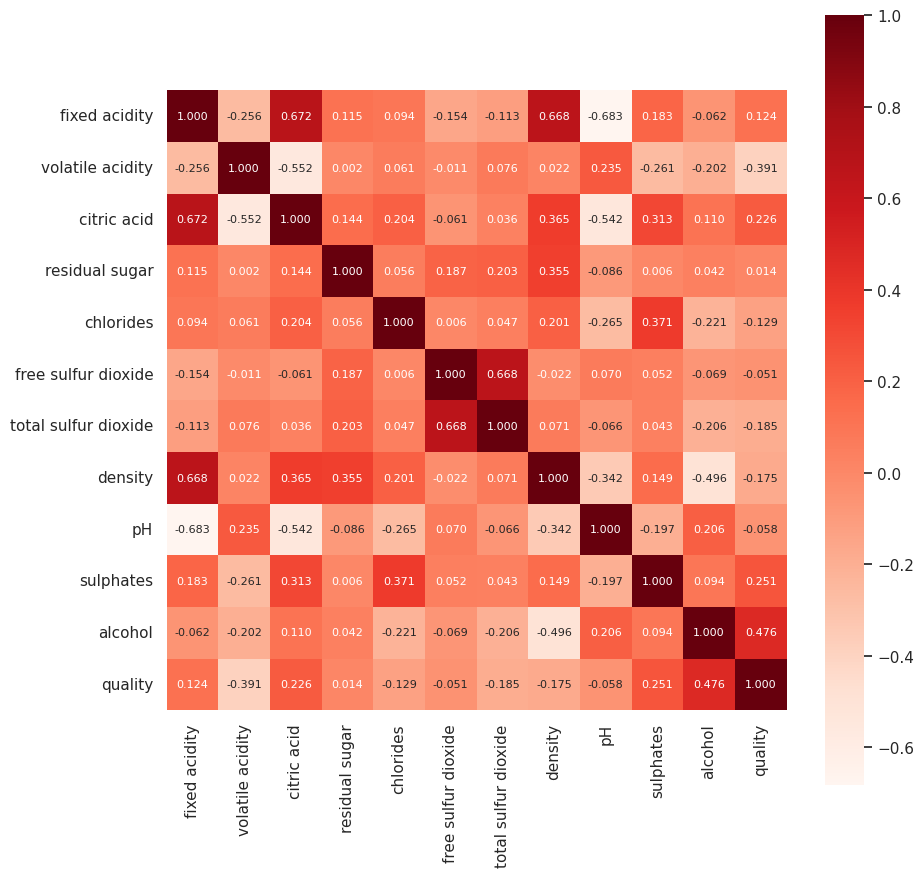

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.3f',annot= True, annot_kws = {'size':8}, cmap ='Reds')

In [ ]:
#separate the data and label
X = wine_dataset.drop('quality',axis = 1)

In [ ]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value:1 if y_value>= 7 else 0) #when the y value is greater or equal to 7 the quality of the wine is good otherwise bad

In [ ]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
wine_dataset.value_counts('quality')

quality
5    681
6    638
7    199
4     53
8     18
3     10
dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify = Y, random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [ ]:
print(X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
557            15.6             0.645         0.49             4.2      0.095   
173             7.4             0.620         0.05             1.9      0.068   
974             8.8             0.330         0.41             5.9      0.073   
247             8.2             0.600         0.17             2.3      0.072   
367            10.4             0.575         0.61             2.6      0.076   
...             ...               ...          ...             ...        ...   
954             7.6             0.430         0.40             2.7      0.082   
634             7.9             0.350         0.21             1.9      0.073   
1259            6.8             0.640         0.00             2.7      0.123   
760             9.0             0.580         0.25             2.8      0.075   
421             6.6             0.840         0.03             2.3      0.059   

      free sulfur dioxide  

In [ ]:
print(Y_train)

557     0
173     0
974     1
247     0
367     0
       ..
954     0
634     0
1259    0
760     0
421     1
Name: quality, Length: 1279, dtype: int64


In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [ ]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [ ]:
print('accuracy on test data:', test_data_accuracy)

accuracy on test data: 0.921875


Building a predictive system

In [ ]:
X_test.to_csv('wine_test.csv',index=False)
#from google.colab import files
#files.download('wine_test.csv')

In [ ]:
input_data = (6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0)
# changing input data to a numpy array
input_data_as_numpy_array= np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction= model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==1):
  print('Good quality wine')
else:
  print('Bad quality wine')

[0]
Bad quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


knn

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
X_train_data_prediction = knn.predict(X_train)
training_accuracy = accuracy_score(Y_train,X_train_data_prediction)
print('accuracy on training data:',training_accuracy)

accuracy on training data: 0.9038311180609852


In [ ]:
X_test_data_prediction = knn.predict(X_test)
test_accuracy = accuracy_score(Y_test,X_test_data_prediction)
print('accuracy on test data:',test_accuracy)

accuracy on test data: 0.875


In [ ]:
input_data1 = (6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0)
input_data1_as_numpy_array= np.array(input_data1)
input_data1_reshaped = input_data1_as_numpy_array.reshape(1,-1)
prediction1= knn.predict(input_data1_reshaped)
print(prediction1)

if(prediction1[0] ==1):
  print('Good quality wine')
else:
  print('Bad quality wine')

[0]
Bad quality wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
